In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis=1)
y = df["sales"]

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly_converter = PolynomialFeatures(degree=2, include_bias=False) # bias - это константа

In [7]:
poly_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [8]:
poly_features = poly_converter.transform(X)

In [9]:
poly_features.shape

(200, 9)

In [10]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [11]:
pd.DataFrame(poly_features, columns=poly_converter.get_feature_names_out(X.columns))

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56
...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44
196,94.2,4.9,8.1,8873.64,461.58,763.02,24.01,39.69,65.61
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96
198,283.6,42.0,66.2,80428.96,11911.20,18774.32,1764.00,2780.40,4382.44


In [12]:
poly_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
poly_features.shape

(200, 9)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
test_predictions = model.predict(X_test)

In [19]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
MAE = mean_absolute_error(y_test, test_predictions)
print(MAE)

0.4896798044803529


In [22]:
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)
print(RMSE)

0.664643175726896


In [23]:
pd.DataFrame([model.coef_], columns=poly_converter.get_feature_names_out(X.columns))

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,0.05171,0.013085,0.012,-0.000111,0.001142,-0.000052,0.000033,0.000146,-0.00003


In [ ]:
# Пошагово:
## Создать различные степени полинома
## Разбить данные на обучающий и тестовый наборы данных
## Обучить модель
## Сохранить метрики RMSE для обучающего и тестового набора данных
## Нарисовать график с результатами

In [24]:
train_rmse_errrors = []
test_rmse_errrors = []

for i in range(1,10):
    poly_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errrors.append(train_rmse)
    test_rmse_errrors.append(test_rmse)

In [25]:
train_rmse_errrors

[1.7345941243293763,
 0.5879574085292231,
 0.4339344356902068,
 0.3517083688399354,
 0.2509342953963137,
 0.1941922497076744,
 5.422154923584399,
 0.14115676725250295,
 0.18133942644140683]

In [26]:
test_rmse_errrors

[1.5161519375993882,
 0.664643175726896,
 0.5803286825206583,
 0.5077742649024465,
 2.5758241100586687,
 4.3624407666497955,
 1378.2338285606265,
 4276.369370807878,
 94189.68718969134]

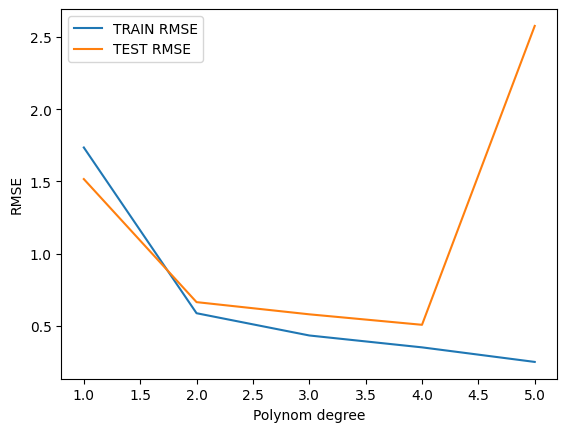

In [31]:
plt.plot(range(1,6), train_rmse_errrors[:5], label="TRAIN RMSE")
plt.plot(range(1,6), test_rmse_errrors[:5], label="TEST RMSE")
plt.xlabel("Polynom degree")
plt.ylabel("RMSE")
plt.legend()

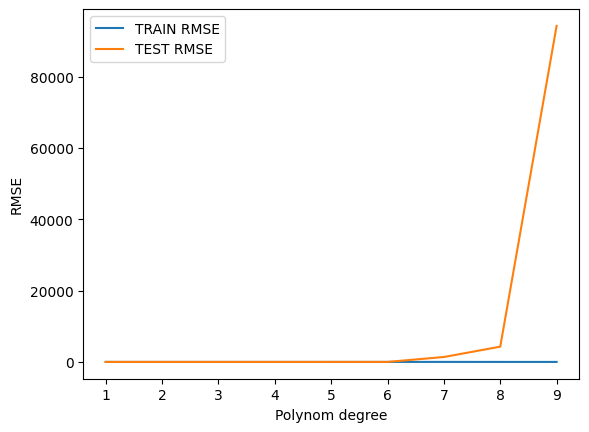

In [32]:
plt.plot(range(1,10), train_rmse_errrors, label="TRAIN RMSE")
plt.plot(range(1,10), test_rmse_errrors, label="TEST RMSE")
plt.xlabel("Polynom degree")
plt.ylabel("RMSE")
plt.legend()

In [33]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [34]:
final_model = LinearRegression()

In [36]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [37]:
from joblib import dump,load

In [39]:
dump(final_model, 'final.joblib')

['final.joblib']

In [40]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [42]:
loaded_converter = load('final_converter.joblib')
loaded_model = load('final.joblib')

In [43]:
campaign = [[149, 22, 12]]

In [45]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [46]:
transformed_data = loaded_converter.fit_transform(campaign)

In [47]:
loaded_model.predict(transformed_data)

array([14.64501014])